### **TAKS 4**

#### ***TASK 1 - ANALYSIS ON ML TEST SCORES***

#### DATASCIENCE & GEN AI INTERNSHIP -- INNOMATICS

In [3]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#loading the dataset

df = pd.read_csv("C:/Users/HP/Documents/MISCELLANEOUS/Downloads/scores_data.csv")
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [13]:
df.shape

(149, 3)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [27]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')


In [29]:
df.columns = df.columns.str.strip()

In [31]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [23]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [33]:
#cleaning the score

df['Score'] = df['Score'].str.split('/').str[0].astype(int)

In [37]:
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6
1,AI_ELITE_7,uid_148,6
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
4,AI_ELITE_7,uid_145,4
...,...,...,...
144,AI_ELITE_4,uid_5,4
145,AI_ELITE_4,uid_4,4
146,AI_ELITE_4,uid_3,4
147,AI_ELITE_4,uid_2,3


In [39]:
#checking the batch size

batch_sizes = df['Batch'].value_counts()
print("Number of students per batch:\n", batch_sizes)

Number of students per batch:
 Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64


In [41]:
df.describe()

,Score
count,149.000000
mean,4.382550
std,1.592199
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [43]:
# Batch-wise aggregates
batch_agg = df.groupby('Batch')['Score'].agg(['mean','median','min','max','std']).reset_index()
batch_agg


,Batch,mean,median,min,max,std
0,AI_ELITE_4,3.791667,4.0,0,7,1.443376
1,AI_ELITE_6,4.229167,4.0,0,7,1.640441
2,AI_ELITE_7,5.056604,5.0,2,7,1.446682


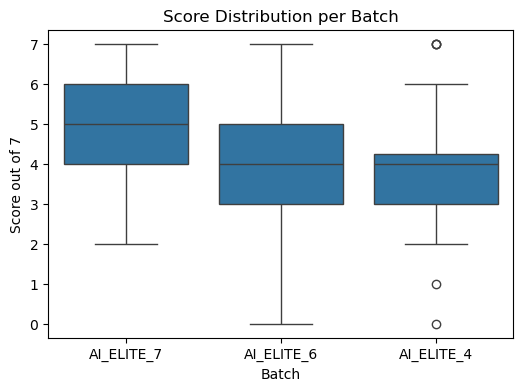

In [45]:
#distribution the target variable per batch

plt.figure(figsize = (6,4))
sns.boxplot(x='Batch', y='Score', data=df)
plt.title("Score Distribution per Batch")
plt.ylabel("Score out of 7")
plt.show()

In [49]:
#count of each score per batch

score_counts = pd.crosstab(df['Batch'], df['Score'])
print(score_counts)

Score       0  1  2  3   4   5   6   7
Batch                                 
AI_ELITE_4  1  1  7  8  19   8   1   3
AI_ELITE_6  1  2  3  9  11  13   4   5
AI_ELITE_7  0  0  2  7  10  11  13  10


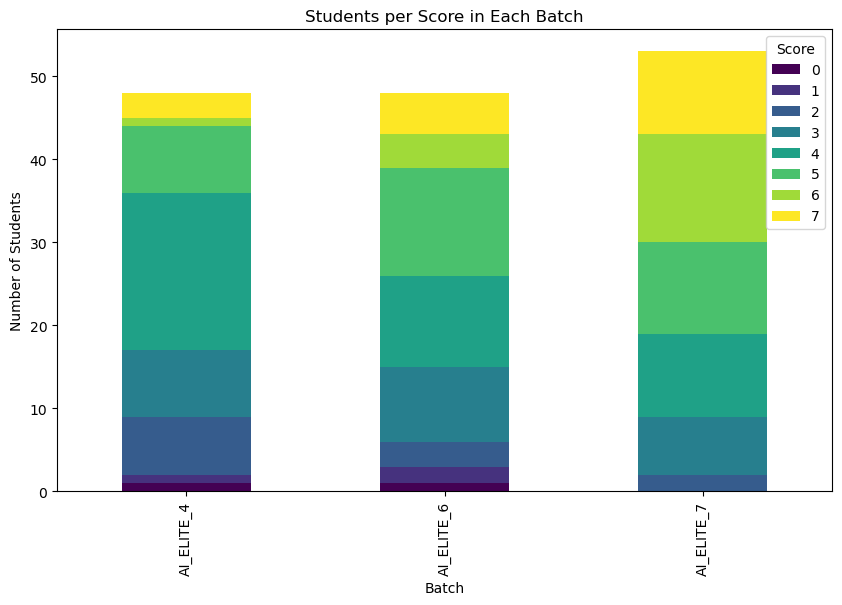

In [61]:
# Simple stacked bar chart
score_counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap = 'viridis')
plt.title("Students per Score in Each Batch")
plt.xlabel("Batch")
plt.ylabel("Number of Students")
plt.legend(title="Score")
plt.show()


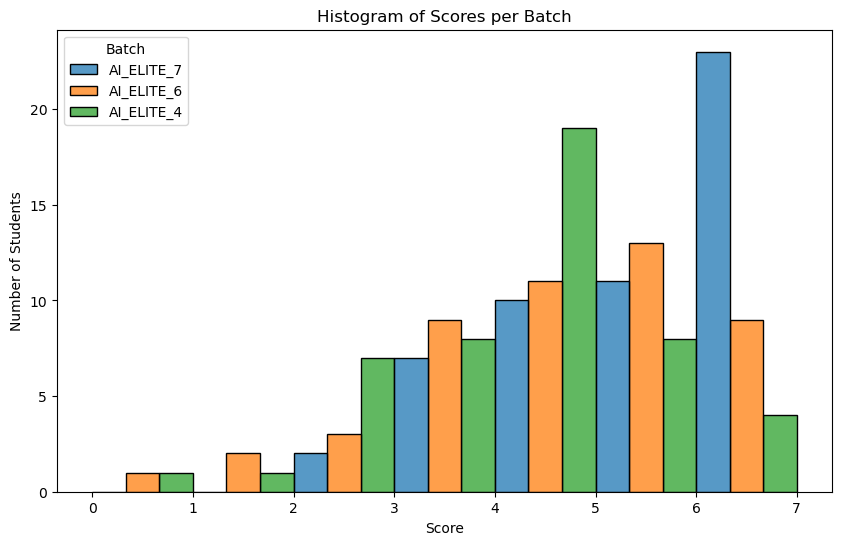

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Score', hue='Batch', multiple='dodge', bins=7)
plt.title("Histogram of Scores per Batch")
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.show()


The score dataset has three columns :Batch, User_ID, and Score. The dataset contains three batches with the following sizes: AI_ELITE_7 (53 students), AI_ELITE_6 (48 students), and AI_ELITE_4 (48 students). Scores are out of 7.

Looking at the performance, AI_ELITE_7 did the best, with an average of 5.06 and a median of 5. Most students scored high, with 13 getting 6 and 10 getting full marks, while very few scored low. AI_ELITE_6 performed in the middle, averaging 4.23, with scores spread out and 13 students scoring 5, though some scored low. AI_ELITE_4 had the lowest scores, averaging 3.79, with many students around 4 and only a few reaching 6 or 7.

Overall,scores get better from AI_ELITE_4 to AI_ELITE_7. 

**AI_ELITE_7 did best, AI_ELITE_6 was in the middle, and AI_ELITE_4 had more low scores.**